# Task 1

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Print dataset description
print("Dataset Shape:", df.shape,"\n")
print(f"Number of instances: {df.shape[0]}\n")
print (f"Number of Features: {df.shape[1]}\n")
print("Features:", df.columns.tolist(),"\n")
print("First Few Rows:\n")
print(df.head())


Dataset Shape: (9357, 15) 

Number of instances: 9357

Number of Features: 15

Features: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'] 

First Few Rows:

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00  

# Task 2


In [2]:
# Drop 'Date' and 'Time' columns as they are unique ID columns for correlation analysis
df_numeric = df.drop(columns=['Date', 'Time'])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr().abs()

# For each attribute, sum the absolute correlations with all other attributes
# Subtract 1 from the diagonal (correlation of the attribute with itself)A
sum_of_correlations = correlation_matrix.sum() - 1

# Find the attribute with the highest sum of correlations
most_influential_attribute = sum_of_correlations.idxmax()
max_sum_of_correlations = sum_of_correlations.max()

# Print the most important attribute
print(f"The most important attribute based on correlation with all others is '{most_influential_attribute}' with a total correlation sum of {max_sum_of_correlations:.2f}")


The most important attribute based on correlation with all others is 'PT08.S1(CO)' with a total correlation sum of 6.52


Mean of PT08.S1(CO): 1048.87
Median of PT08.S1(CO): 1052.50
Mode of PT08.S1(CO): -200.00
Standard Deviation of PT08.S1(CO): 329.82
Variance of PT08.S1(CO): 108779.26
Min of PT08.S1(CO): -200.00
Max of PT08.S1(CO): 2039.75
Range of PT08.S1(CO): 2239.75



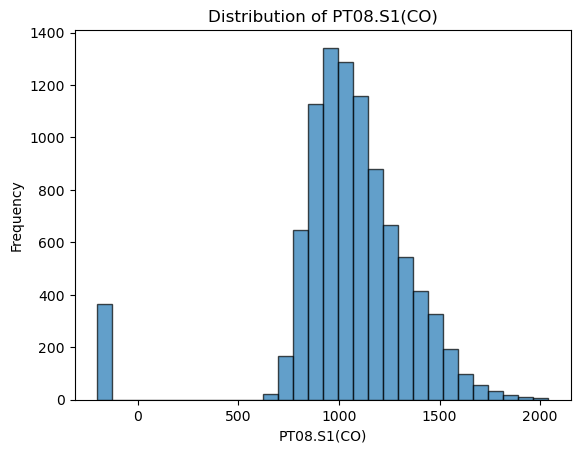

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select a numerical attribute for analysis
attribute = 'PT08.S1(CO)'

# Compute measures of central tendency and dispersion
mean_value = df[attribute].mean()
median_value = df[attribute].median()
mode_value = df[attribute].mode()[0]
std_dev = df[attribute].std()
variance = df[attribute].var()
min_value = df[attribute].min()
max_value = df[attribute].max()
range_value = max_value - min_value

# Print results
print(f"Mean of {attribute}: {mean_value:.2f}")
print(f"Median of {attribute}: {median_value:.2f}")
print(f"Mode of {attribute}: {mode_value:.2f}")
print(f"Standard Deviation of {attribute}: {std_dev:.2f}")
print(f"Variance of {attribute}: {variance:.2f}")
print(f"Min of {attribute}: {min_value:.2f}")
print(f"Max of {attribute}: {max_value:.2f}")
print(f"Range of {attribute}: {range_value:.2f}\n")

# Visualization

plt.hist(df[attribute].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of {attribute}')
plt.xlabel(attribute)
plt.ylabel('Frequency')
plt.savefig('histogram.png')
plt.show()

In [4]:
# Print no. of missing values
missing_count = ((df[attribute] == -200)).sum()
print(f"Number of missing values (including -200): {missing_count}")

Number of missing values (including -200): 366


In [5]:
# Replace -200 values with NaN so we can handle them consistently as missing values
df[attribute] = df[attribute].replace(-200, pd.NA)

# Compute the median value for the attribute
median_value = df[attribute].median()

# Fill missing values (both NaN and previously -200) with the median
df[attribute] = df[attribute].fillna(median_value).infer_objects(copy=False)

# Verify if missing values are handled
print(df[attribute].isnull().sum())  # Should print 0 if all missing values are filled


0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22852\2424072556.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[attribute] = df[attribute].fillna(median_value).infer_objects(copy=False)


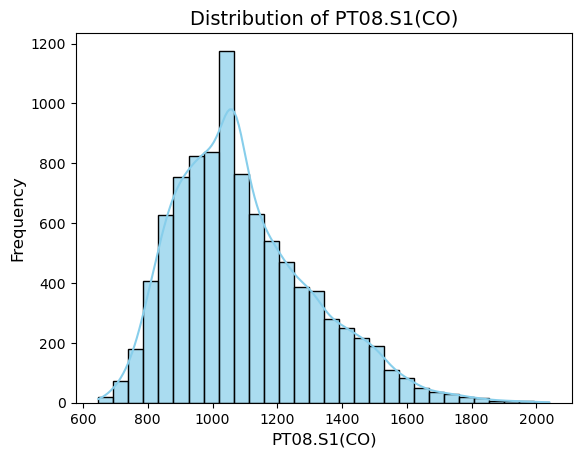

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn histogram (with KDE curve)
sns.histplot(df[attribute].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title(f'Distribution of {attribute}', fontsize=14)
plt.xlabel(attribute, fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Saving and displaying the plot
plt.savefig('sns_histogram_after_handling_missing_values.png')
plt.show()


In [7]:
import numpy as np
import pandas as pd

# Replace -200 values with NaN and fill missing values with median
df[attribute] = df[attribute].replace(-200, pd.NA)
median_value = df[attribute].median()
df[attribute] = df[attribute].fillna(median_value)

# Central tendency
mean_value = df[attribute].mean()
median_value = df[attribute].median()
mode_value = df[attribute].mode().values[0]  # Mode might return multiple values, taking the first

# Measures of dispersion
std_deviation = df[attribute].std()  # Standard deviation
variance_value = df[attribute].var()  # Variance
range_value = df[attribute].max() - df[attribute].min()  # Range
iqr_value = np.percentile(df[attribute], 75) - np.percentile(df[attribute], 25)  # Interquartile range

# Output results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance_value}")
print(f"Range: {range_value}")
print(f"IQR (Interquartile Range): {iqr_value}")


Mean: 1098.27202450928
Median: 1063.0
Mode: 1063.0
Standard Deviation: 212.91509327233845
Variance: 45332.83694316858
Range: 1392.5
IQR (Interquartile Range): 280.0


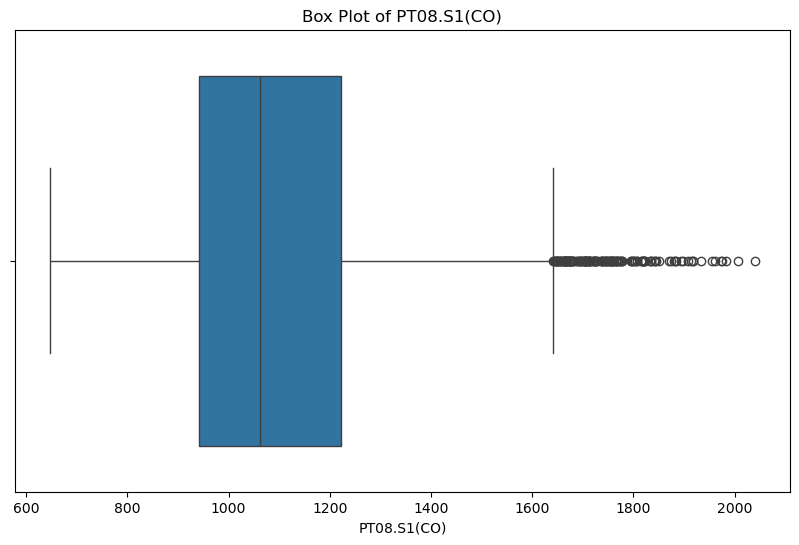

Number of outliers: 72


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Attribute to analyze
attribute = 'PT08.S1(CO)'

# Box plot to identify outliers
plt.figure(figsize=(10, 6))  # Optional: Set figure size for better visibility
sns.boxplot(x=df[attribute])
plt.title('Box Plot of ' + attribute)

# Save the plot as an image file (e.g., PNG)
plt.savefig('boxplot_' + attribute + '.png', format='png', dpi=300)

# Show the plot
plt.show()

# Z-score to identify outliers
z_scores = stats.zscore(df[attribute].dropna())
outliers = df[attribute][abs(z_scores) > 3]
print("Number of outliers:", outliers.shape[0])


# Task 3

In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Select an attribute for normalization
attribute = 'PT08.S1(CO)'

# Replace erroneous values (-200) with NaN for proper missing value handling
df[attribute] = df[attribute].replace(-200, pd.NA)

# Fill missing values in the selected attribute with its median
median_value = df[attribute].median()
df[attribute] = df[attribute].fillna(median_value)

# Normalize the attribute
scaler = MinMaxScaler()
df[attribute + '_normalized'] = scaler.fit_transform(df[[attribute]])

# Print results
print(f"Normalized values of {attribute}:")
print(df[[attribute, attribute + '_normalized']].head())


Normalized values of PT08.S1(CO):
   PT08.S1(CO)  PT08.S1(CO)_normalized
0      1360.00                0.511849
1      1292.25                0.463196
2      1402.00                0.542011
3      1375.50                0.522980
4      1272.25                0.448833


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22852\1415268321.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[attribute] = df[attribute].fillna(median_value)


# Task 4

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load and preprocess the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Replace -200 with NaN
df.replace(-200, np.nan, inplace=True)

# Separate numeric and non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])
non_numeric_df = df.select_dtypes(exclude=[np.number])

# Compute medians for numeric columns and fill missing values
df[numeric_df.columns] = numeric_df.fillna(numeric_df.median())

# Reset index and sample 20 data objects
df.reset_index(drop=True, inplace=True)
sampled_df = df.sample(n=20, random_state=1)

# Extract numeric features for similarity calculation
features = sampled_df.select_dtypes(include=[np.number])

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Compute Cosine Similarity
cosine_sim = cosine_similarity(scaled_features)

def get_max_similarity_pair(similarity_matrix):
    """Find the indices of the pair with the maximum similarity score and return the score."""
    np.fill_diagonal(similarity_matrix, 0)  # Set diagonal to 0 to avoid self-similarity
    max_similarity_idx = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)
    max_similarity_score = similarity_matrix[max_similarity_idx]
    return max_similarity_idx, max_similarity_score

def print_pair_info(df, idx, measure_name, score):
    """Print details of the pair with maximum similarity and the similarity score."""
    # Extract numeric columns for displaying pairs
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    pair_1 = df.iloc[idx[0]][numeric_columns]
    pair_2 = df.iloc[idx[1]][numeric_columns]
    
    print(f"\n{measure_name} Similarity:")
    print(f"Pair with maximum similarity (Index {idx[0]} and {idx[1]}):")
    print(f"Pair 1:\n{pair_1}\n")
    print(f"Pair 2:\n{pair_2}\n")
    print(f"Similarity Score: {score:.4f}")

    # Check if they are really similar
    if score > 0.8:  # Adjust this threshold based on your context
        print("The pairs are really similar.")
    else:
        print("The pairs are not very similar.")

# Get the pair with maximum similarity and the similarity score
cosine_max_idx, cosine_max_score = get_max_similarity_pair(cosine_sim)
print_pair_info(sampled_df, cosine_max_idx, 'Cosine Similarity', cosine_max_score)



Cosine Similarity Similarity:
Pair with maximum similarity (Index 0 and 2):
Pair 1:
CO(GT)                   1.1
PT08.S1(CO)      1047.333333
NMHC(GT)                74.0
C6H6(GT)            4.932008
PT08.S2(NMHC)          760.0
NOx(GT)                 64.0
PT08.S3(NOx)          1032.0
NO2(GT)                 74.0
PT08.S4(NO2)     1378.666667
PT08.S5(O3)           1003.0
T                  11.466667
RH                 61.433333
AH                  0.830289
Name: 822, dtype: object

Pair 2:
CO(GT)                 1.8
PT08.S1(CO)         1129.5
NMHC(GT)              56.0
C6H6(GT)          5.191654
PT08.S2(NMHC)        773.0
NOx(GT)               70.0
PT08.S3(NOx)       1130.25
NO2(GT)               82.0
PT08.S4(NO2)       1451.75
PT08.S5(O3)         1050.5
T                     12.1
RH               61.100001
AH                0.860316
Name: 82, dtype: object

Similarity Score: 0.9681
The pairs are really similar.


# Task 5

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Replace -200 with NaN
df.replace(-200, np.nan, inplace=True)

# Separate numeric and non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute medians for numeric columns and fill missing values
df[numeric_df.columns] = numeric_df.fillna(numeric_df.median())

# Reset index and sample 20 data objects
df.reset_index(drop=True, inplace=True)
sampled_df = df.sample(n=20, random_state=1)

# Extract numeric features for similarity calculation
features = sampled_df.select_dtypes(include=[np.number])

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=5)  # Reduce to 5 dimensions, you can adjust this based on your needs
pca_features = pca.fit_transform(scaled_features)

# Compute Cosine Similarity
cosine_sim_pca = cosine_similarity(pca_features)

def get_max_similarity_pair(similarity_matrix):
    np.fill_diagonal(similarity_matrix, 0)  # Set diagonal to 0 to avoid self-similarity
    max_similarity_idx = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)
    max_similarity_score = similarity_matrix[max_similarity_idx]
    return max_similarity_idx, max_similarity_score

def print_pair_info(df, idx, measure_name, score):
    # Extract numeric columns for displaying pairs
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    pair_1 = df.iloc[idx[0]][numeric_columns]
    pair_2 = df.iloc[idx[1]][numeric_columns]
    
    print(f"\n{measure_name} Similarity:")
    print(f"Pair with maximum similarity (Index {idx[0]} and {idx[1]}):")
    print(f"Pair 1:\n{pair_1}\n")
    print(f"Pair 2:\n{pair_2}\n")
    print(f"Similarity Score: {score:.4f}")

    # Check if they are really similar
    if score > 0.8:  # You can adjust this threshold based on your context
        print("The pairs are really similar.")
    else:
        print("The pairs are not very similar.")

# Get the pair with maximum similarity and the similarity score after PCA
pca_max_idx, pca_max_score = get_max_similarity_pair(cosine_sim_pca)
print_pair_info(sampled_df, pca_max_idx, 'Cosine Similarity (PCA)', pca_max_score)




Cosine Similarity (PCA) Similarity:
Pair with maximum similarity (Index 10 and 16):
Pair 1:
CO(GT)                 1.8
PT08.S1(CO)         1125.0
NMHC(GT)             150.0
C6H6(GT)         12.170581
PT08.S2(NMHC)       1055.5
NOx(GT)              179.8
PT08.S3(NOx)         645.0
NO2(GT)              109.0
PT08.S4(NO2)        1715.5
PT08.S5(O3)         929.25
T                33.825001
RH                  29.225
AH                1.514256
Name: 4150, dtype: object

Pair 2:
CO(GT)                 2.1
PT08.S1(CO)        1180.75
NMHC(GT)             150.0
C6H6(GT)         12.816446
PT08.S2(NMHC)       1077.5
NOx(GT)              159.0
PT08.S3(NOx)         706.0
NO2(GT)              122.0
PT08.S4(NO2)       1869.75
PT08.S5(O3)        1139.75
T                     35.4
RH                  27.825
AH                1.573265
Name: 2657, dtype: object

Similarity Score: 0.9854
The pairs are really similar.


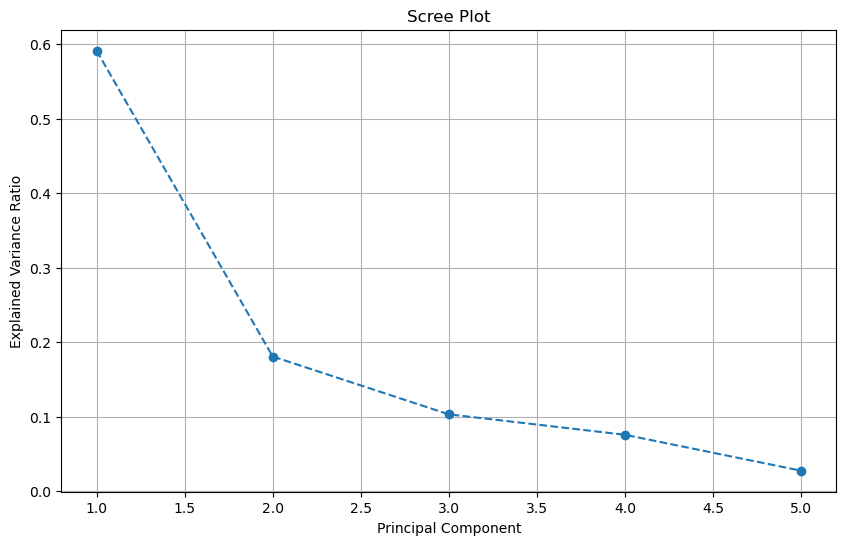

Dimension Details after PCA:

Explained Variance Ratio for each Principal Component:
PC1: 0.5914
PC2: 0.1807
PC3: 0.1031
PC4: 0.0756
PC5: 0.0274

Cumulative Explained Variance Ratio:
PC1: 0.5914
PC2: 0.7721
PC3: 0.8751
PC4: 0.9508
PC5: 0.9781

Principal Components (Loadings):
PC1: [ 0.34492862  0.33707433  0.06322231  0.35426103  0.35201093  0.29817699
 -0.32442131  0.32720973  0.27648803  0.34063724  0.11016456 -0.07342537
  0.05257104]
PC2: [ 0.14271999  0.15355303 -0.23922705  0.01501506 -0.04839629  0.2112071
  0.04776545  0.09061993 -0.30407794  0.14826984 -0.61121721  0.33437171
 -0.49123827]
PC3: [-0.07794254  0.08073365 -0.5495173  -0.09925671 -0.02905356 -0.09628982
 -0.00213746 -0.03818745  0.29207126  0.16388612  0.02060397  0.58232164
  0.46078183]
PC4: [ 0.0972446   0.13124127 -0.63018628  0.10121408  0.14239622 -0.32592841
  0.1206921  -0.22128964  0.16736476  0.0325719   0.09674064 -0.47163934
 -0.33915212]
PC5: [ 0.09345098 -0.26301915 -0.21866943 -0.01335577 -0.1704899

In [12]:
import matplotlib.pyplot as plt

# Fit PCA with the number of components used in the previous analysis
pca = PCA(n_components=5)  # Ensure this matches the number of components used in the analysis
pca.fit(scaled_features)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Principal components (loadings)
components = pca.components_

# Create a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.savefig('scree_plot_after_pca.png')
plt.show()

# Print dimension details
print("Dimension Details after PCA:\n")

print("Explained Variance Ratio for each Principal Component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"PC{i}: {variance:.4f}")

print("\nCumulative Explained Variance Ratio:")
cumulative_variance = np.cumsum(explained_variance)
for i, variance in enumerate(cumulative_variance, start=1):
    print(f"PC{i}: {variance:.4f}")

print("\nPrincipal Components (Loadings):")
for i, component in enumerate(components, start=1):
    print(f"PC{i}: {component}")

print("\nNote: The principal components are the directions in which the data varies the most. The loadings indicate the contribution of each original feature to the principal components.")


repeat task-4

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load and preprocess the dataset
df = pd.read_excel('AirQualityUCI.xlsx')

# Replace -200 with NaN
df.replace(-200, np.nan, inplace=True)

# Separate numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute medians for numeric columns and fill missing values
df[numeric_df.columns] = numeric_df.fillna(numeric_df.median())

# Reset index and sample 20 data objects
df.reset_index(drop=True, inplace=True)
sampled_df = df.sample(n=20, random_state=1)

# Extract numeric features for similarity calculation
features = sampled_df.select_dtypes(include=[np.number])

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Compute Cosine Similarity
cosine_sim_original = cosine_similarity(scaled_features)

def get_max_similarity_pair(similarity_matrix):
    np.fill_diagonal(similarity_matrix, 0)  # Set diagonal to 0 to avoid self-similarity
    max_similarity_idx = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)
    max_similarity_score = similarity_matrix[max_similarity_idx]
    return max_similarity_idx, max_similarity_score

def print_pair_info(df, idx, measure_name, score):
    # Extract numeric columns for displaying pairs
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    pair_1 = df.iloc[idx[0]][numeric_columns]
    pair_2 = df.iloc[idx[1]][numeric_columns]
    
    print(f"\n{measure_name} Similarity:")
    print(f"Pair with maximum similarity (Index {idx[0]} and {idx[1]}):")
    print(f"Pair 1:\n{pair_1}\n")
    print(f"Pair 2:\n{pair_2}\n")
    print(f"Similarity Score: {score:.4f}")

    # Check if they are really similar
    if score > 0.8:  # You can adjust this threshold based on your context
        print("The pairs are really similar.")
    else:
        print("The pairs are not very similar.")

# Get the pair with maximum similarity and the similarity score in the original dataset
original_max_idx, original_max_score = get_max_similarity_pair(cosine_sim_original)
print_pair_info(sampled_df, original_max_idx, 'Cosine Similarity (Original)', original_max_score)



Cosine Similarity (Original) Similarity:
Pair with maximum similarity (Index 0 and 2):
Pair 1:
CO(GT)                   1.1
PT08.S1(CO)      1047.333333
NMHC(GT)                74.0
C6H6(GT)            4.932008
PT08.S2(NMHC)          760.0
NOx(GT)                 64.0
PT08.S3(NOx)          1032.0
NO2(GT)                 74.0
PT08.S4(NO2)     1378.666667
PT08.S5(O3)           1003.0
T                  11.466667
RH                 61.433333
AH                  0.830289
Name: 822, dtype: object

Pair 2:
CO(GT)                 1.8
PT08.S1(CO)         1129.5
NMHC(GT)              56.0
C6H6(GT)          5.191654
PT08.S2(NMHC)        773.0
NOx(GT)               70.0
PT08.S3(NOx)       1130.25
NO2(GT)               82.0
PT08.S4(NO2)       1451.75
PT08.S5(O3)         1050.5
T                     12.1
RH               61.100001
AH                0.860316
Name: 82, dtype: object

Similarity Score: 0.9681
The pairs are really similar.


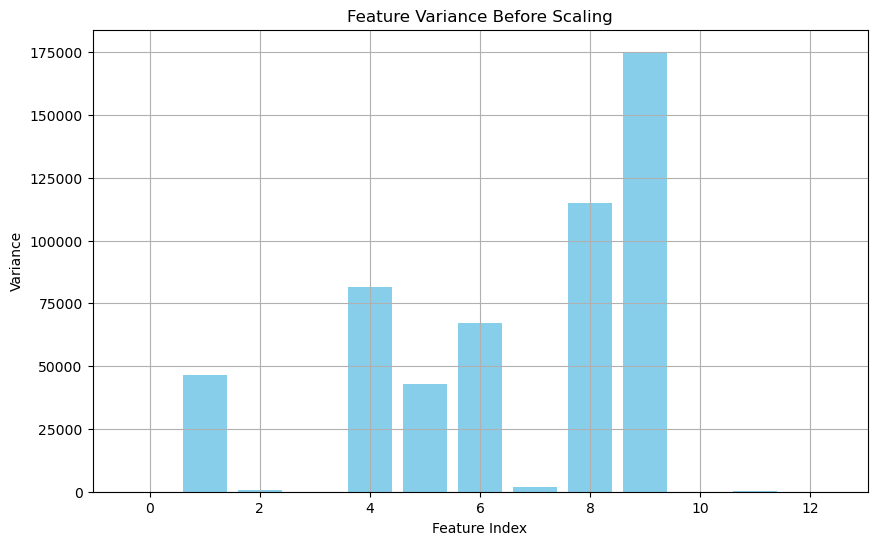

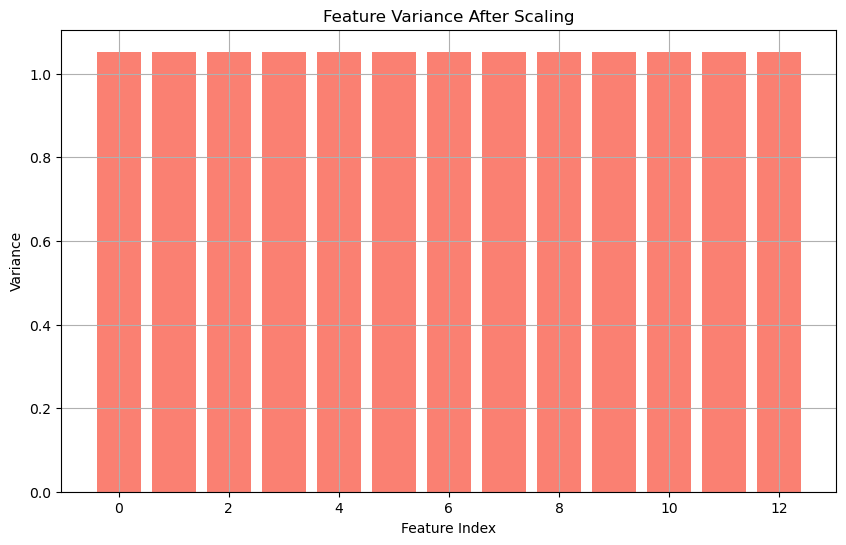

Dimension Analysis:

Number of Features (Dimensions): 13

Feature Variance Before Scaling:
Feature 1: 2.0929
Feature 2: 46644.5713
Feature 3: 693.0000
Feature 4: 53.0124
Feature 5: 81560.1429
Feature 6: 42995.0089
Feature 7: 67274.7888
Feature 8: 2055.3694
Feature 9: 114807.4505
Feature 10: 175210.1574
Feature 11: 69.1173
Feature 12: 230.2564
Feature 13: 0.1494

Feature Variance After Scaling:
Feature 1: 1.0526
Feature 2: 1.0526
Feature 3: 1.0526
Feature 4: 1.0526
Feature 5: 1.0526
Feature 6: 1.0526
Feature 7: 1.0526
Feature 8: 1.0526
Feature 9: 1.0526
Feature 10: 1.0526
Feature 11: 1.0526
Feature 12: 1.0526
Feature 13: 1.0526


In [14]:
import matplotlib.pyplot as plt

# Dimension Analysis
def analyze_dimensions(features, scaled_features):
    # Number of features (dimensions)
    num_features = features.shape[1]
    
    # Compute the variance of each feature before scaling
    variance_before_scaling = features.var()
    
    # Compute the variance of each feature after scaling
    scaled_variance = pd.DataFrame(scaled_features).var()
    
    # Plot variance before scaling
    plt.figure(figsize=(10, 6))
    plt.bar(range(num_features), variance_before_scaling, color='skyblue')
    plt.xlabel('Feature Index')
    plt.ylabel('Variance')
    plt.title('Feature Variance Before Scaling')
    plt.grid(True)
    plt.savefig('Feature Variance Before Scaling.png')
    plt.show()
    
    # Plot variance after scaling
    plt.figure(figsize=(10, 6))
    plt.bar(range(num_features), scaled_variance, color='salmon')
    plt.xlabel('Feature Index')
    plt.ylabel('Variance')
    plt.title('Feature Variance After Scaling')
    plt.grid(True)
    plt.savefig('Feature Variance After Scaling.png')
    plt.show()

    # Print dimension details
    print("Dimension Analysis:\n")
    print(f"Number of Features (Dimensions): {num_features}")
    print("\nFeature Variance Before Scaling:")
    for i, var in enumerate(variance_before_scaling, start=1):
        print(f"Feature {i}: {var:.4f}")
    
    print("\nFeature Variance After Scaling:")
    for i, var in enumerate(scaled_variance, start=1):
        print(f"Feature {i}: {var:.4f}")

# Perform dimension analysis on the original dataset
analyze_dimensions(features, scaled_features)
